In [1]:
%%javascript
if(MathJax) {
    MathJax.Hub.Config({
        TeX: { equationNumbers: { autoNumber: "AMS" } }
    });
}


<IPython.core.display.Javascript object>

In [2]:
%%javascript
if(MathJax) {
  MathJax.Hub.Queue(
    ["resetEquationNumbers", MathJax.InputJax.TeX],
    ["PreProcess", MathJax.Hub],
    ["Reprocess", MathJax.Hub]
  );
}

<IPython.core.display.Javascript object>

## ニューラルネットワーク

パーセプトロンは，複雑な振る舞いをする関数であっても重みやバイアスを変えるだけで表現できる可能性を秘めていたが，問題としては，その重みを人間が与えていたことが課題であった．

適切な重みをデータから自動で学習できると言うのがニューラルネットワークの重要な性質の1つである。
ニューロン同士のつながり方に関して言えば，パーセプトロンと何ら変わることはない．

$$
\begin{equation}
y = \begin{cases}
    0 \quad(b + w_1 x_1 + w_2 x_2 \leqq 0) \\
    1 \quad(b + w_1 x_1 + w_2 x_2 > 0) \\
\end{cases}
\end{equation}
$$

を

$$
\begin{equation}
y = h(b + w_1 x_1 + w_2 x_2)
\end{equation}
$$

とおくと，

$$
\begin{equation}
h(x) = \begin{cases}
    0 \quad(x \leqq 0) \\
    1 \quad(x > 0) \\
\end{cases}
\end{equation}
$$

とかきなおせる．この$h(x)$を活性化関数と呼ぶ.

パーセプトロンでは，この活性化関数に，閾値を超えれば，On/Offを切り替える**ステップ関数**を使っているといえる．

また，ニューラルネットワークでよく使われる活性化関数として，

### シグモイド関数

$$
\begin{equation}
h(x) = \frac{1}{1 + exp(-x)}
\end{equation}
$$

### ReLU

$$
\begin{equation}
h(x) = \begin{cases}
x\quad(x>0) \\
0\quad(x\leqq0) \\
\end{cases}
\end{equation}
$$


重要なこととして，ニューラルネットワークでは，活性化関数に非線形関数を用いる必要があることが挙げられる．線形関数を用いると，隠れ層を用いなくても同じことを行うネットワークが必ず存在するため，結局隠れ層を使う意味がなくなってしまうからである．

これは，$h(x) = cx$とすると，たとえば３層の場合, $y = h(h(h(x))$となるが，展開して，$y=c^3x$と書けてしまうから，というのがわかりやすい説明だろう．

以下，活性化関数の実装をしていく

In [7]:
import numpy as np

# numpyを使うことで，numpyの配列（ベクトル）や行列も受け取ることができるようになる
def step_function(x):
    y = x > 0
    return y.astype(np.int)

print(step_function(np.array([-1.0, 0.5, 1.0])))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

[0 1 1]


## ニューラルネットワークの実装

ここでは２層の隠れ層を持つ，３層ニューラルネットワークを構築する

記号の確認

1. $w^{(1)}_{12}$は，入力の２番目($x_2$)から，１層目の第一ニューロンへの重みを表す
2. $b^{(1)}_1$は，１層目の第一ニューロンへのバイアスを表す

$$
\begin{equation}
a^{(1)}_1 = w^{(1)}_{11} x_1 + w^{(1)}_{12} x_2 + b^{(1)}_1
\end{equation}
$$

$$
\begin{equation}
z^{(1)}_1 = h(a^{(1)}_1)
\end{equation}
$$

$$
\begin{equation}
a^{(2)}_1 = w^{(2)}_{11} a^{(1)}_1 + w^{(2)}_{12} a^{(1)}_2 + w^{(2)}_{13} a^{(1)}_3 + b^{(2)}_1
\end{equation}
$$

$$
\begin{equation}
z^{(2)}_1 = h(a^{(2)}_1)
\end{equation}
$$

$$
\begin{equation}
a^{(3)}_1 = w^{(3)}_{11} a^{(2)}_1 + w^{(3)}_{12} a^{(2)}_2 + b^{(3)}_1
\end{equation}
$$

$$
\begin{equation}
y_1 = \sigma(a^{(3)}_1)
\end{equation}
$$

出力層の活性化関数である，$\sigma(x)$は, $h(x)$とは別物である．
以下の例では，`identity_function`が，それにあたる．

In [4]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b3'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

n = init_network()
x = np.array([1.0, 0.5])
print(forward(n, x))

[0.31682708 0.69627909]


## 出力層の設計

機械学習の問題は，大きく分類問題と回帰問題に分かれる．分類の場合には`softmax`, 回帰の場合には`identity`（＝恒等関数）を使われる事が多い

### ソフトマックス

出力を0-1の確率に変える（合計は１となる）

$$
\begin{equation}
y_k = \frac{exp(a_k)}{\sum^n_{i=1} exp(a_i)}
\end{equation}
$$

しかし，このソフトマックスをコンピュータ上でそのまま計算すると，桁が大きくなりすぎてオーバーフローが起きてしまう．そこで，

$$
\begin{equation}
y_k = \frac{exp(a_k)}{\sum^n_{i=1} exp(a_i)} = \frac{C exp(a_k)}{C \sum^n_{i=1} exp(a_i)} \\
= \frac{exp(a_k) + logC}{\sum^n_{i=1} exp(a_i) + logC} \\
= \frac{exp(a_k) + C'}{\sum^n_{i=1} exp(a_i) + C'}
\end{equation}
$$

つまり，分母と分子には任意の定数を足しても結果が変わらないことを利用して，たとえば，$exp(a_i)$の最大値をあらかじめ引いてやるなどの工夫をしておく必要がある．

ちなみに，ソフトマックスはそれなりに重い処理であるため，クラス分類で出力の一番大きなものだけを認識結果として使う「推論」フェーズの場合，ソフトマックスを省略して，単に，`np.max(a)`を結果とすることが多い．ソフトマックスが利用されるのは，主に学習フェーズである．



In [17]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

print(softmax(np.array([0.1,0.2,0.4])))

[0.28943311 0.31987306 0.39069383]


(60000, 784)
(60000,)
(10000, 784)
(10000,)
3


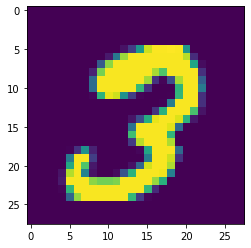

In [12]:
import sys, os
import os.path as path
sys.path.append(path.abspath(path.join(os.curdir ,"../..")))
from dataset.mnist import load_mnist
from matplotlib.pyplot import imshow
from PIL import Image

%matplotlib inline

(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

def show(i):
    img = x_train[i]
    label = y_train[i]

    img = img.reshape(28, 28)
    imshow(img)
    print(label)

show(12345)

In [22]:
# mnistの推論
import pickle

def load_mnist_network():
    with open("../../ch03/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predcit_mnist(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

def run_mnist():
    n = load_mnist_network()
    accu = 0
    for i in range(len(x_test)):
        y = predcit_mnist(n, x_test[i])
        p = np.argmax(y)
        if p == y_test[i]:
            accu += 1

    print("Accuracy: " + str(float(accu) / float(len(x_test))))

run_mnist()

# mnistの推論（バッチ編）
def run_mnist_in_batch():
    n = load_mnist_network()
    batch_size = 100
    accu = 0
    for i in range(0, len(x_test), batch_size):
        x_batch = x_test[i:i+batch_size]
        y_batch = predcit_mnist(n, x_batch)
        p = np.argmax(y_batch, axis=1)
        accu += np.sum(p == y_test[i:i+batch_size])

    print("Accuracy: " + str(float(accu) / float(len(x_test))))

run_mnist_in_batch()

Accuracy: 0.9207
Accuracy: 0.9207
